**Assessment Title:** ML_CA1<br>
**Lecturer Name:** David McQuaid<br>
**Student Full Name:** Luciano Gimenez<br>
**Student Number:** 2023370<br>
**Assessment Due Date:** 31/05/24<br>
**Date of Submission:** 31/05/24<br>
**Github Link:** https://github.com/2023370-student-cct/machine-learning-for-ai-ca2/blob/main/LucianoGimenez_ML_CA2.ipynb<br>
**Declaration:** <br>By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
___


- [x] Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]<br>
- [x] Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the  “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm.[0-40]<br>
- [x] Make a Prediction of a new customers income, who is not available in the original dataset.[0-5]<br>
- [ ] Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]<br>
- [ ] Visualize your sentiment analysis showing the positive, neutral, and negative sentiment expressed[0-5]<br>


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

In [45]:
RSEED = 123
data = pd.read_csv('./BankRecords.csv')

# Exploratory data analysis

In [3]:
data

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0        1   25                  1                   49      91107       4   
1        2   45                 19                   34      90089       3   
2        3   39                 15                   11      94720       1   
3        4   35                  9                  100      94112       1   
4        5   35                  8                   45      91330       4   
...    ...  ...                ...                  ...        ...     ...   
4995  4996   29                  3                   40      92697       1   
4996  4997   30                  4                   15      92037       4   
4997  4998   63                 39                   24      93023       2   
4998  4999   65                 40                   49      90034       3   
4999  5000   28                  4                   83      92612       3   

      Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0              1.6   Diploma                      0            No   
1              1.5   Diploma                      0            No   
2              1.0   Diploma                      0            No   
3              2.7    Degree                      0            No   
4              1.0    Degree                      0            No   
...            ...       ...                    ...           ...   
4995           1.9   Masters                      0            No   
4996           0.4   Diploma                     85            No   
4997           0.3   Masters                      0            No   
4998           0.5    Degree                      0            No   
4999           0.8   Diploma                      0            No   

     Securities Account CD Account Online Banking CreditCard  
0                   Yes         No             No         No  
1                   Yes         No             No         No  
2                    No         No             No         No  
3                    No         No             No         No  
4                    No         No             No        Yes  
...                 ...        ...            ...        ...  
4995                 No         No            Yes         No  
4996                 No         No            Yes         No  
4997                 No         No             No         No  
4998                 No         No            Yes         No  
4999                 No         No            Yes        Yes  

[5000 rows x 14 columns]

In [4]:
data.describe()

ID          Age  Experience(Years)  Income(Thousands's)  \
count  5000.000000  5000.000000        5000.000000          5000.000000   
mean   2500.500000    45.338400          20.104600            73.774200   
std    1443.520003    11.463166          11.467954            46.033729   
min       1.000000    23.000000          -3.000000             8.000000   
25%    1250.750000    35.000000          10.000000            39.000000   
50%    2500.500000    45.000000          20.000000            64.000000   
75%    3750.250000    55.000000          30.000000            98.000000   
max    5000.000000    67.000000          43.000000           224.000000   

          Sort Code       Family  Credit Score  Mortgage(Thousands's)  
count   5000.000000  5000.000000   5000.000000            5000.000000  
mean   93152.503000     2.396400      1.937913              56.498800  
std     2121.852197     1.147663      1.747666             101.713802  
min     9307.000000     1.000000      0.000000               0.000000  
25%    91911.000000     1.000000      0.700000               0.000000  
50%    93437.000000     2.000000      1.500000               0.000000  
75%    94608.000000     3.000000      2.500000             101.000000  
max    96651.000000     4.000000     10.000000             635.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [6]:
negatives = (data.select_dtypes(include=['int', 'float']) < 0).sum()
negatives

ID                        0
Age                       0
Experience(Years)        52
Income(Thousands's)       0
Sort Code                 0
Family                    0
Credit Score              0
Mortgage(Thousands's)     0
dtype: int64

In [7]:
data['Experience(Years)'] = data['Experience(Years)'].abs()
negatives = (data.select_dtypes(include=['int', 'float']) < 0).sum()
negatives

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Mortgage(Thousands's)    0
dtype: int64

In [8]:
data.nunique()

ID                       5000
Age                        45
Experience(Years)          44
Income(Thousands's)       162
Sort Code                 467
Family                      4
Credit Score              108
Education                   3
Mortgage(Thousands's)     347
Personal Loan               2
Securities Account          2
CD Account                  2
Online Banking              2
CreditCard                  2
dtype: int64

In [9]:
(data == 0).sum()

ID                          0
Age                         0
Experience(Years)          66
Income(Thousands's)         0
Sort Code                   0
Family                      0
Credit Score              106
Education                   0
Mortgage(Thousands's)    3462
Personal Loan               0
Securities Account          0
CD Account                  0
Online Banking              0
CreditCard                  0
dtype: int64

In [10]:
data

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0        1   25                  1                   49      91107       4   
1        2   45                 19                   34      90089       3   
2        3   39                 15                   11      94720       1   
3        4   35                  9                  100      94112       1   
4        5   35                  8                   45      91330       4   
...    ...  ...                ...                  ...        ...     ...   
4995  4996   29                  3                   40      92697       1   
4996  4997   30                  4                   15      92037       4   
4997  4998   63                 39                   24      93023       2   
4998  4999   65                 40                   49      90034       3   
4999  5000   28                  4                   83      92612       3   

      Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0              1.6   Diploma                      0            No   
1              1.5   Diploma                      0            No   
2              1.0   Diploma                      0            No   
3              2.7    Degree                      0            No   
4              1.0    Degree                      0            No   
...            ...       ...                    ...           ...   
4995           1.9   Masters                      0            No   
4996           0.4   Diploma                     85            No   
4997           0.3   Masters                      0            No   
4998           0.5    Degree                      0            No   
4999           0.8   Diploma                      0            No   

     Securities Account CD Account Online Banking CreditCard  
0                   Yes         No             No         No  
1                   Yes         No             No         No  
2                    No         No             No         No  
3                    No         No             No         No  
4                    No         No             No        Yes  
...                 ...        ...            ...        ...  
4995                 No         No            Yes         No  
4996                 No         No            Yes         No  
4997                 No         No             No         No  
4998                 No         No            Yes         No  
4999                 No         No            Yes        Yes  

[5000 rows x 14 columns]

In [11]:
#encoding object features
data_encoded = data.copy()
data_encoded['Personal Loan'] = data_encoded['Personal Loan'].map({'Yes': 1, 'No': 0})

In [12]:
data_encoded

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0        1   25                  1                   49      91107       4   
1        2   45                 19                   34      90089       3   
2        3   39                 15                   11      94720       1   
3        4   35                  9                  100      94112       1   
4        5   35                  8                   45      91330       4   
...    ...  ...                ...                  ...        ...     ...   
4995  4996   29                  3                   40      92697       1   
4996  4997   30                  4                   15      92037       4   
4997  4998   63                 39                   24      93023       2   
4998  4999   65                 40                   49      90034       3   
4999  5000   28                  4                   83      92612       3   

      Credit Score Education  Mortgage(Thousands's)  Personal Loan  \
0              1.6   Diploma                      0              0   
1              1.5   Diploma                      0              0   
2              1.0   Diploma                      0              0   
3              2.7    Degree                      0              0   
4              1.0    Degree                      0              0   
...            ...       ...                    ...            ...   
4995           1.9   Masters                      0              0   
4996           0.4   Diploma                     85              0   
4997           0.3   Masters                      0              0   
4998           0.5    Degree                      0              0   
4999           0.8   Diploma                      0              0   

     Securities Account CD Account Online Banking CreditCard  
0                   Yes         No             No         No  
1                   Yes         No             No         No  
2                    No         No             No         No  
3                    No         No             No         No  
4                    No         No             No        Yes  
...                 ...        ...            ...        ...  
4995                 No         No            Yes         No  
4996                 No         No            Yes         No  
4997                 No         No             No         No  
4998                 No         No            Yes         No  
4999                 No         No            Yes        Yes  

[5000 rows x 14 columns]

In [13]:
data_encoded['Securities Account'] = data_encoded['Securities Account'].map({'Yes': 1, 'No': 0})
data_encoded['CD Account'] = data_encoded['CD Account'].map({'Yes': 1, 'No': 0})
data_encoded['Online Banking'] = data_encoded['Online Banking'].map({'Yes': 1, 'No': 0})
data_encoded['CreditCard'] = data_encoded['CreditCard'].map({'Yes': 1, 'No': 0})

In [14]:
data_encoded.head()

ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's)  Personal Loan  \
0           1.6   Diploma                      0              0   
1           1.5   Diploma                      0              0   
2           1.0   Diploma                      0              0   
3           2.7    Degree                      0              0   
4           1.0    Degree                      0              0   

   Securities Account  CD Account  Online Banking  CreditCard  
0                   1           0               0           0  
1                   1           0               0           0  
2                   0           0               0           0  
3                   0           0               0           0  
4                   0           0               0           1

In [15]:
data_encoded = pd.get_dummies(data_encoded, columns=['Education'], dtype=int)
data_encoded = data_encoded.drop('ID', axis = 1)

In [16]:
data_encoded

Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0      25                  1                   49      91107       4   
1      45                 19                   34      90089       3   
2      39                 15                   11      94720       1   
3      35                  9                  100      94112       1   
4      35                  8                   45      91330       4   
...   ...                ...                  ...        ...     ...   
4995   29                  3                   40      92697       1   
4996   30                  4                   15      92037       4   
4997   63                 39                   24      93023       2   
4998   65                 40                   49      90034       3   
4999   28                  4                   83      92612       3   

      Credit Score  Mortgage(Thousands's)  Personal Loan  Securities Account  \
0              1.6                      0              0                   1   
1              1.5                      0              0                   1   
2              1.0                      0              0                   0   
3              2.7                      0              0                   0   
4              1.0                      0              0                   0   
...            ...                    ...            ...                 ...   
4995           1.9                      0              0                   0   
4996           0.4                     85              0                   0   
4997           0.3                      0              0                   0   
4998           0.5                      0              0                   0   
4999           0.8                      0              0                   0   

      CD Account  Online Banking  CreditCard  Education_Degree  \
0              0               0           0                 0   
1              0               0           0                 0   
2              0               0           0                 0   
3              0               0           0                 1   
4              0               0           1                 1   
...          ...             ...         ...               ...   
4995           0               1           0                 0   
4996           0               1           0                 0   
4997           0               0           0                 0   
4998           0               1           0                 1   
4999           0               1           1                 0   

      Education_Diploma  Education_Masters  
0                     1                  0  
1                     1                  0  
2                     1                  0  
3                     0                  0  
4                     0                  0  
...                 ...                ...  
4995                  0                  1  
4996                  1                  0  
4997                  0                  1  
4998                  0                  0  
4999                  1                  0  

[5000 rows x 15 columns]

In [17]:
data_graph = data.copy()

In [18]:
data_graph = data_graph.drop('Sort Code', axis=1)
data_graph = data_graph.drop('ID', axis=1)
data_graph

Age  Experience(Years)  Income(Thousands's)  Family  Credit Score  \
0      25                  1                   49       4           1.6   
1      45                 19                   34       3           1.5   
2      39                 15                   11       1           1.0   
3      35                  9                  100       1           2.7   
4      35                  8                   45       4           1.0   
...   ...                ...                  ...     ...           ...   
4995   29                  3                   40       1           1.9   
4996   30                  4                   15       4           0.4   
4997   63                 39                   24       2           0.3   
4998   65                 40                   49       3           0.5   
4999   28                  4                   83       3           0.8   

     Education  Mortgage(Thousands's) Personal Loan Securities Account  \
0      Diploma                      0            No                Yes   
1      Diploma                      0            No                Yes   
2      Diploma                      0            No                 No   
3       Degree                      0            No                 No   
4       Degree                      0            No                 No   
...        ...                    ...           ...                ...   
4995   Masters                      0            No                 No   
4996   Diploma                     85            No                 No   
4997   Masters                      0            No                 No   
4998    Degree                      0            No                 No   
4999   Diploma                      0            No                 No   

     CD Account Online Banking CreditCard  
0            No             No         No  
1            No             No         No  
2            No             No         No  
3            No             No         No  
4            No             No        Yes  
...         ...            ...        ...  
4995         No            Yes         No  
4996         No            Yes         No  
4997         No             No         No  
4998         No            Yes         No  
4999         No            Yes        Yes  

[5000 rows x 12 columns]

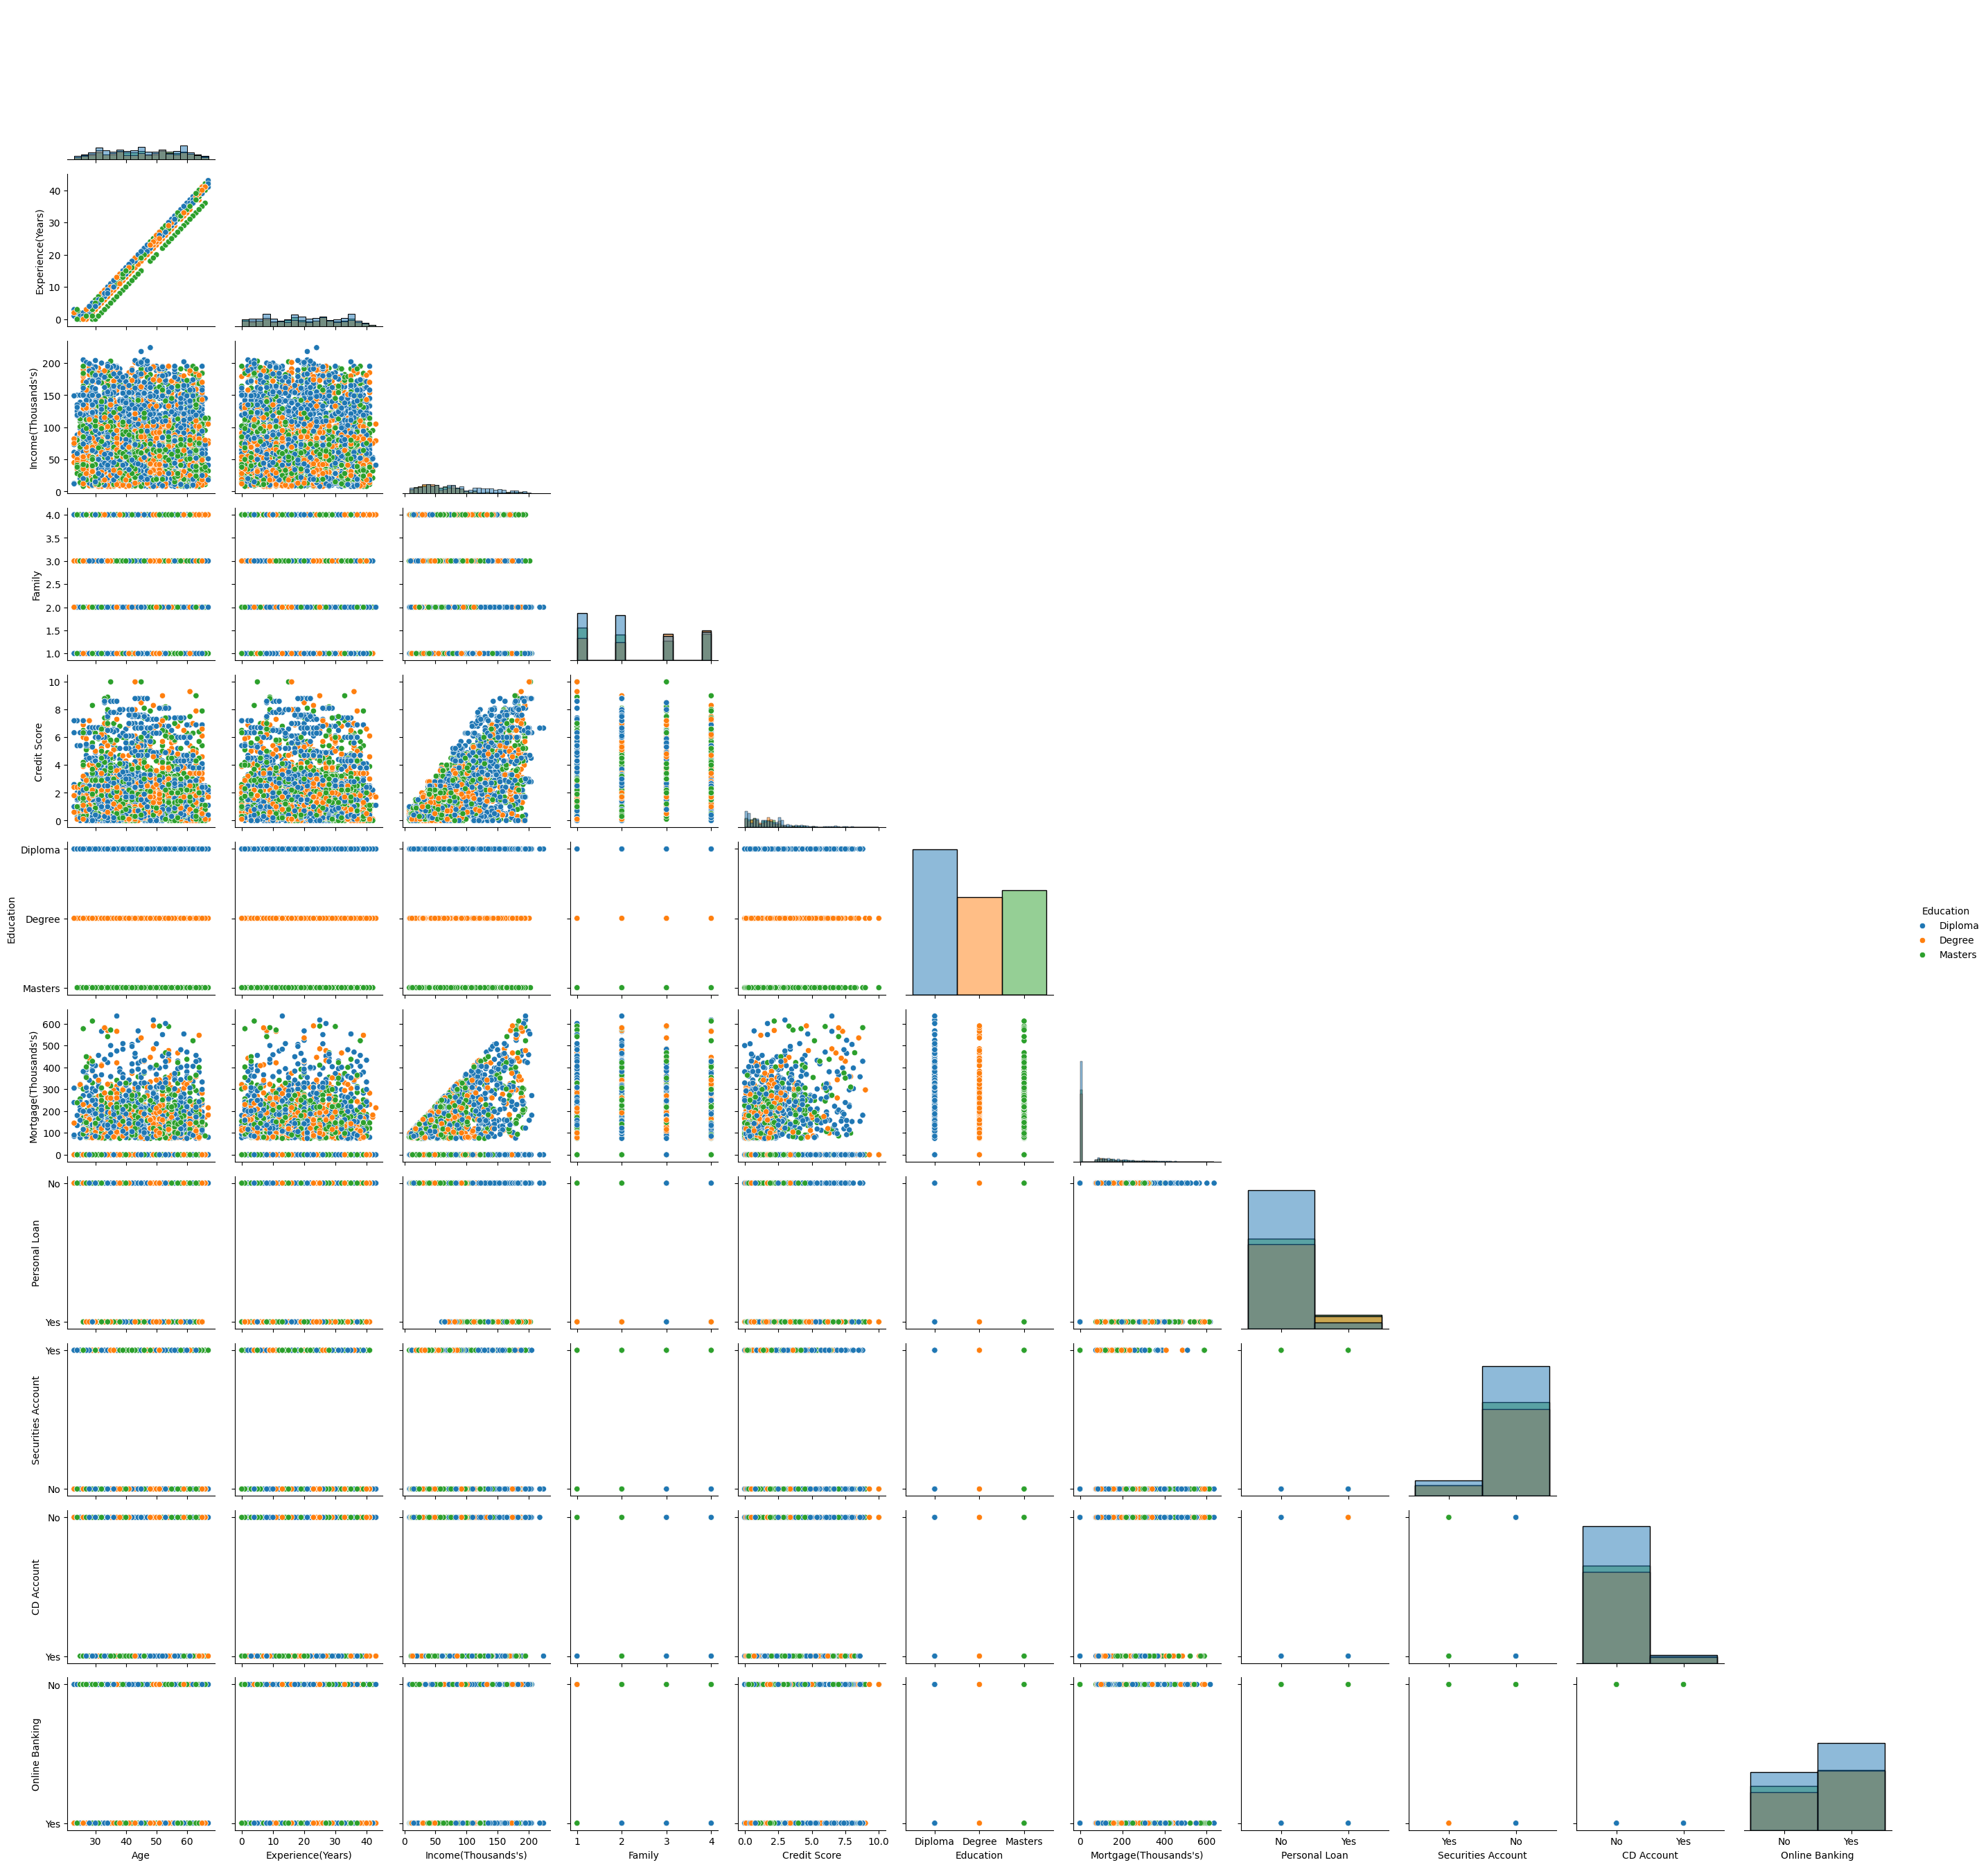

In [19]:
g = sns.PairGrid(data_graph, vars = data_graph.columns[0:11],hue = 'Education', corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend();

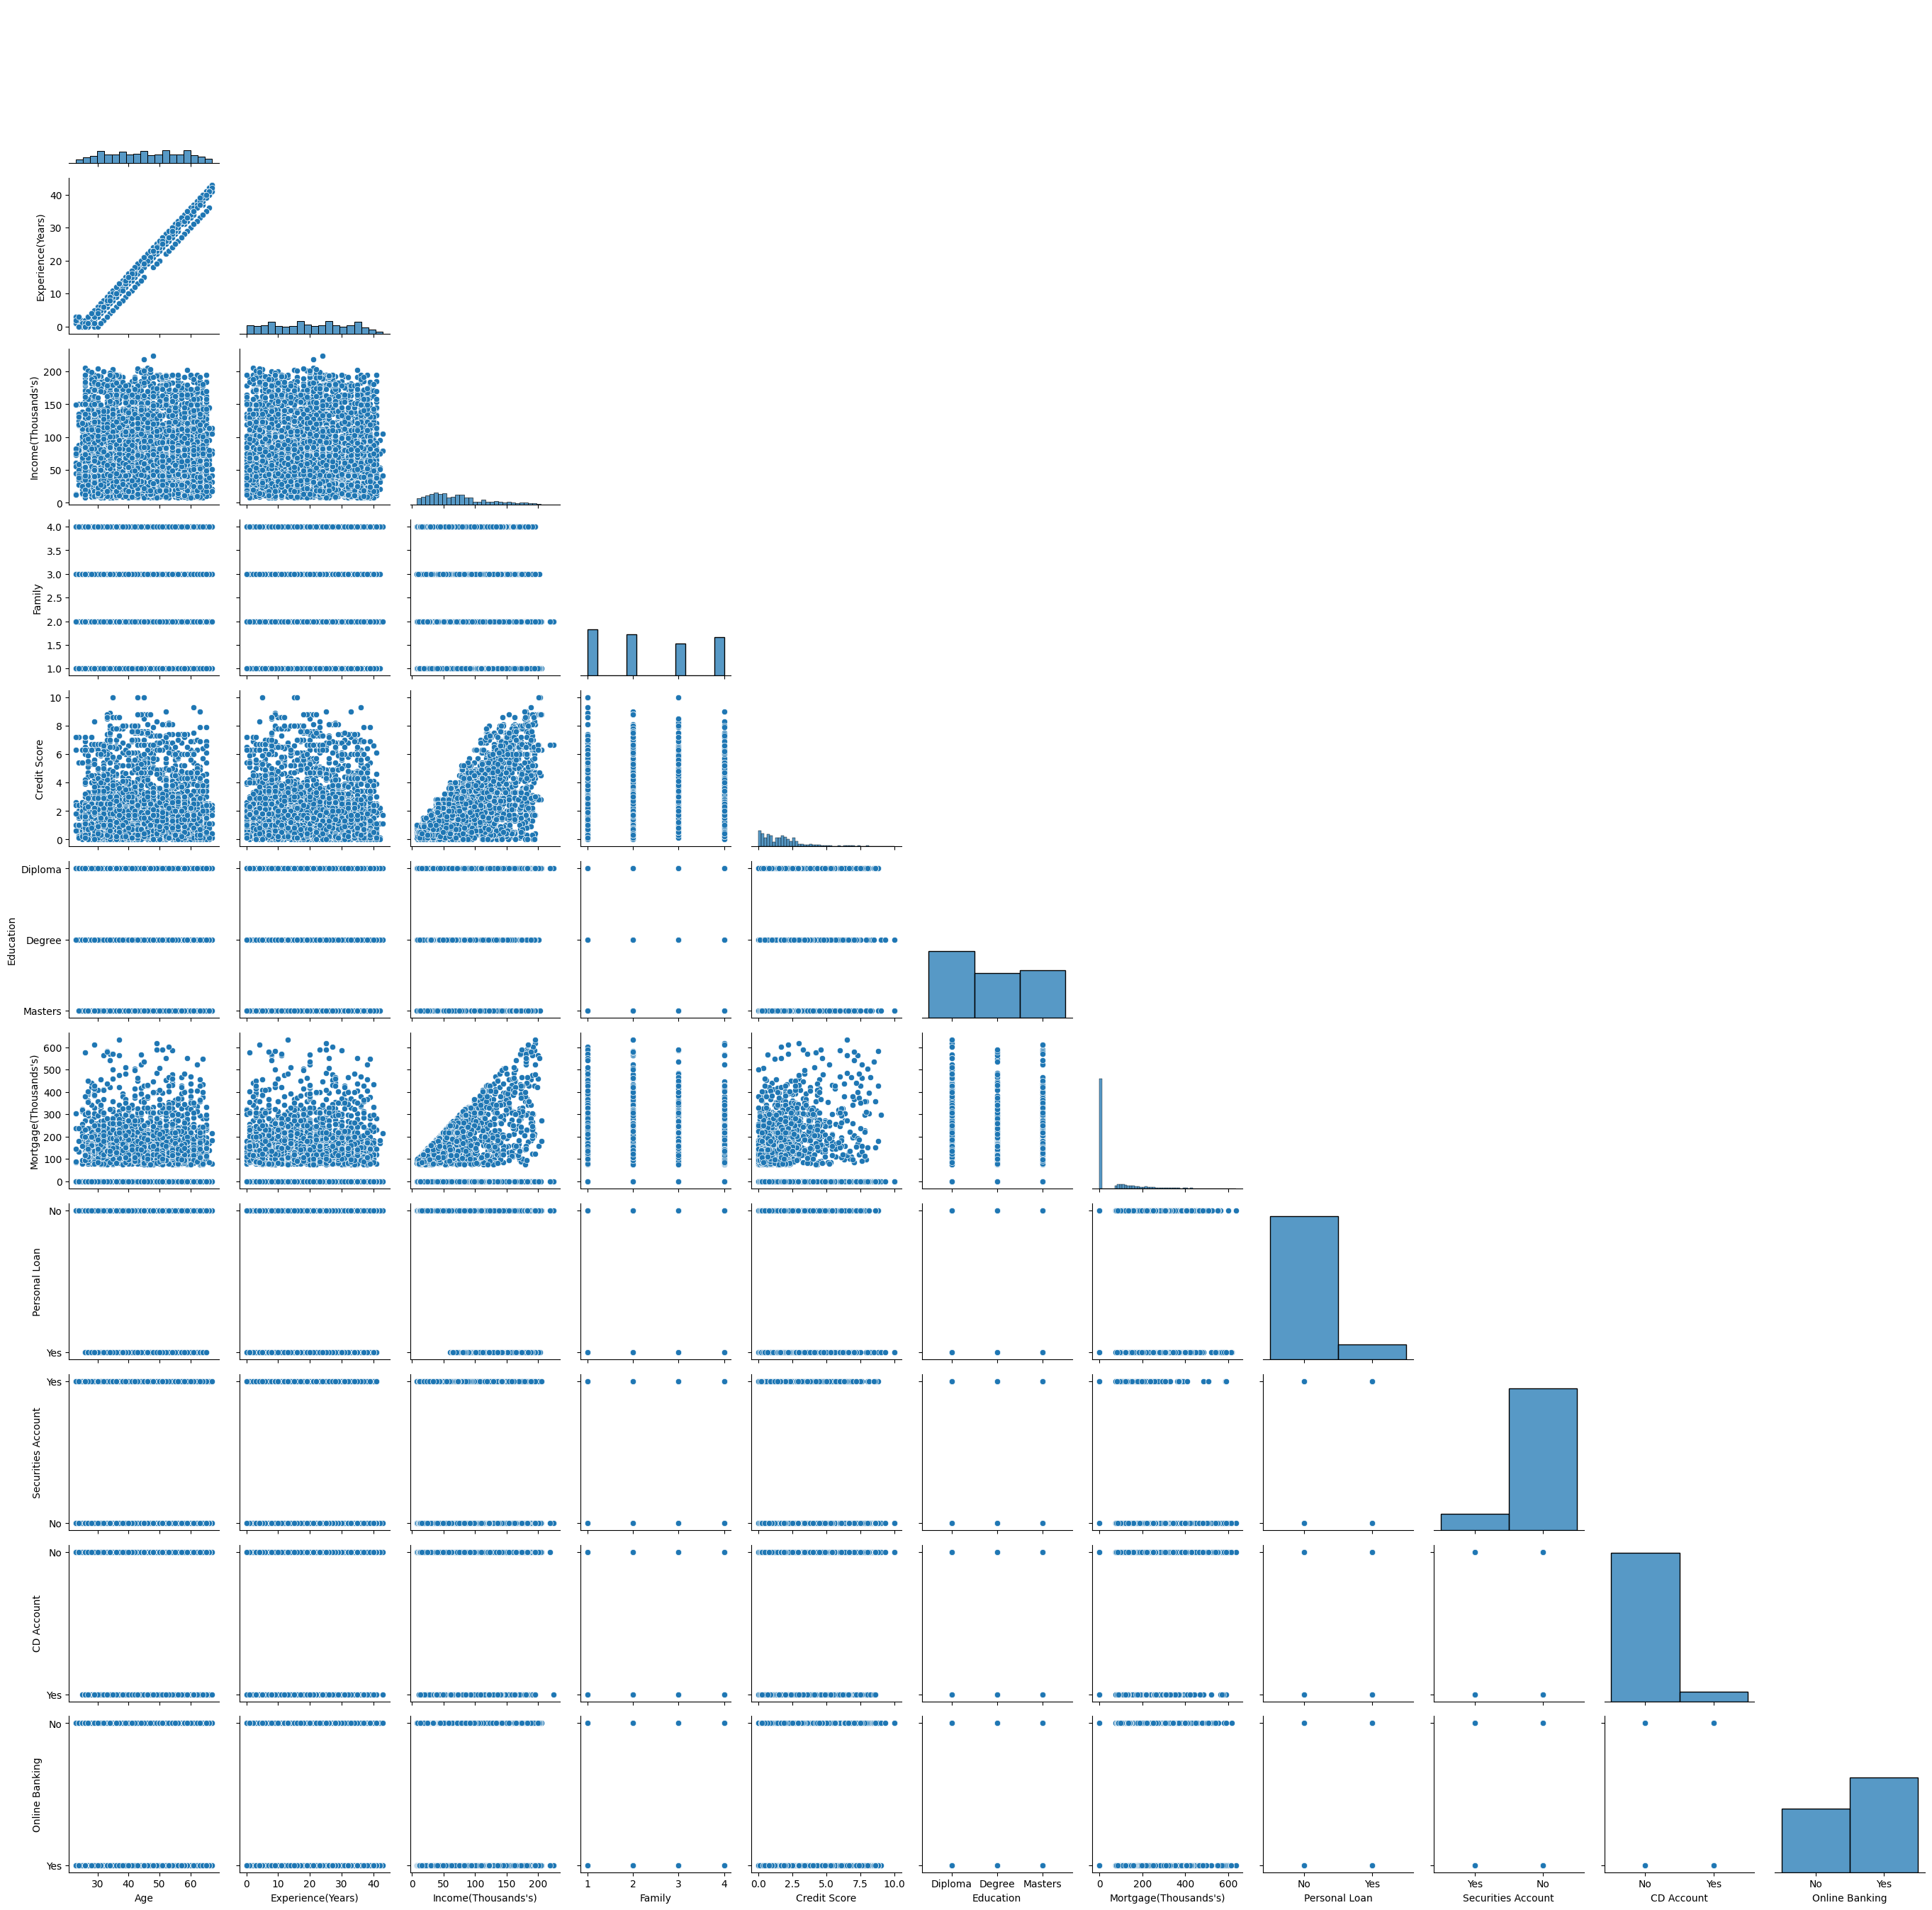

In [20]:
g = sns.PairGrid(data_graph, vars = data_graph.columns[0:11], corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

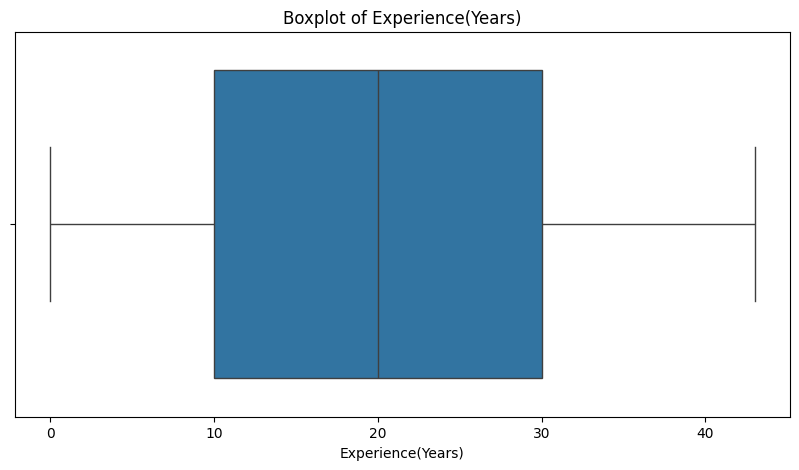

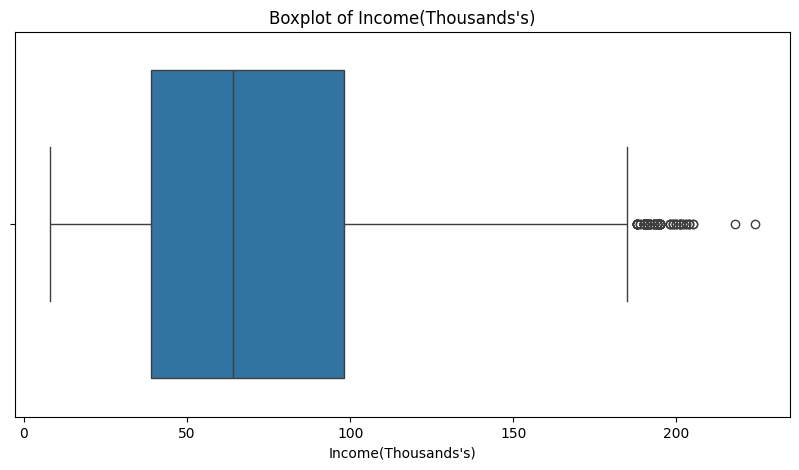

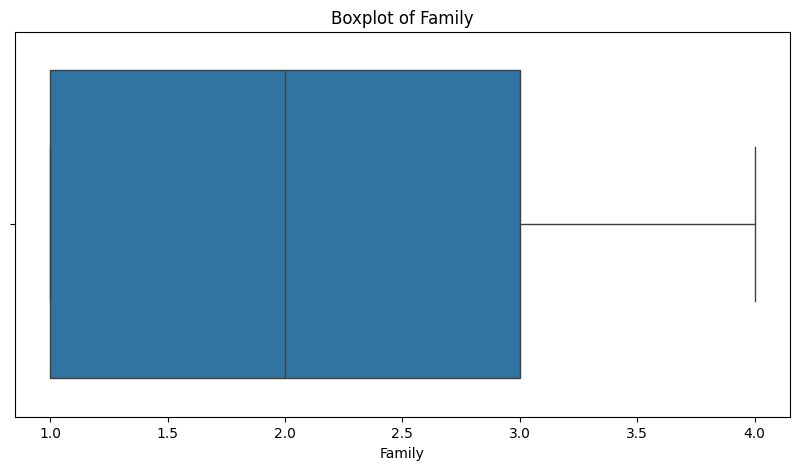

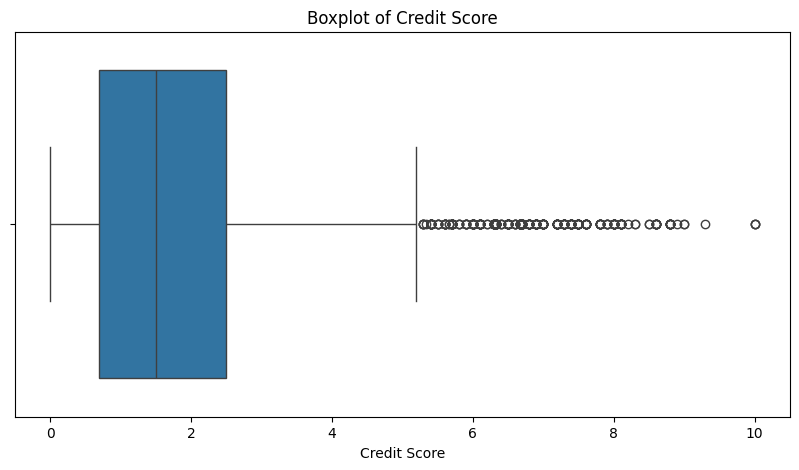

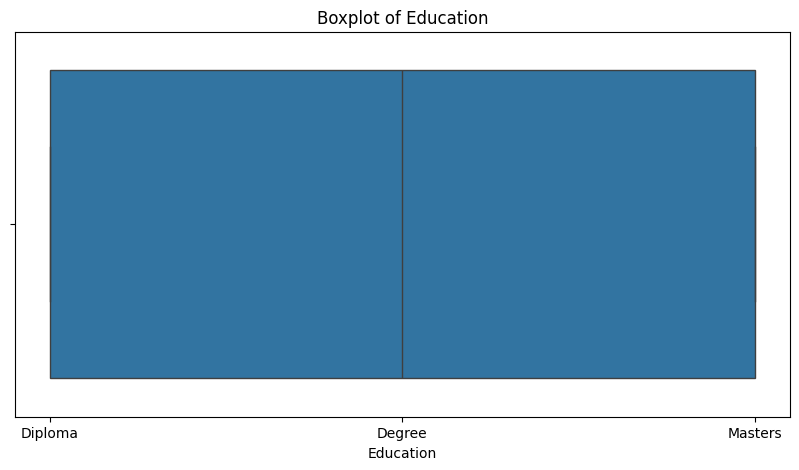

In [21]:
for column in data_graph.columns[1:6]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_graph[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

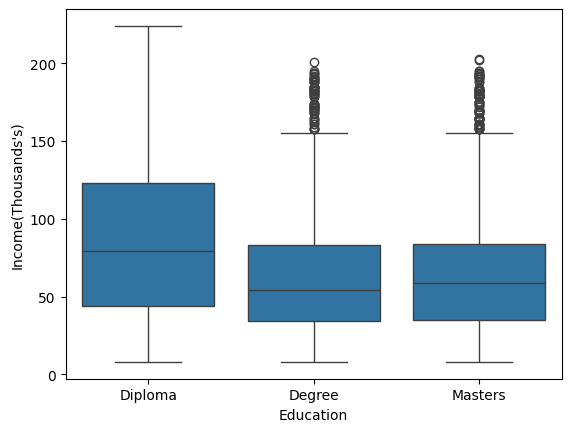

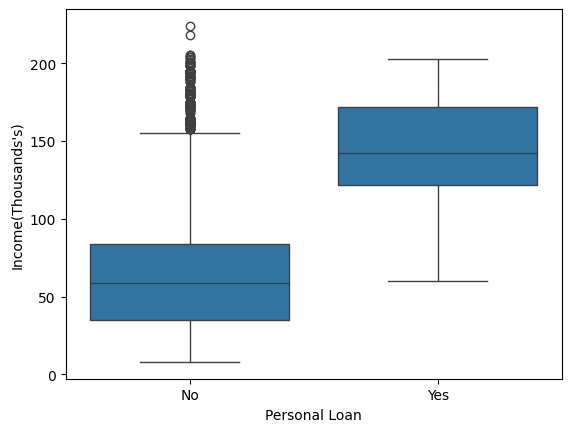

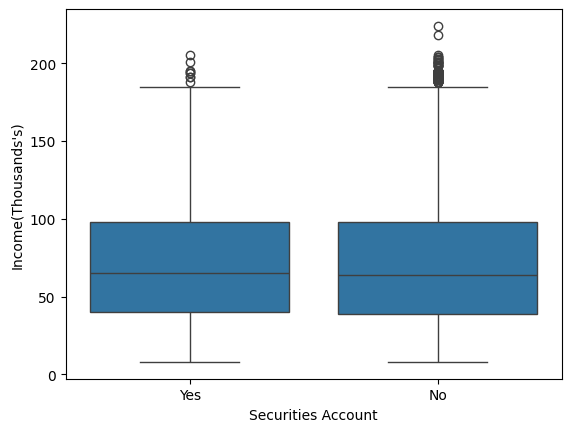

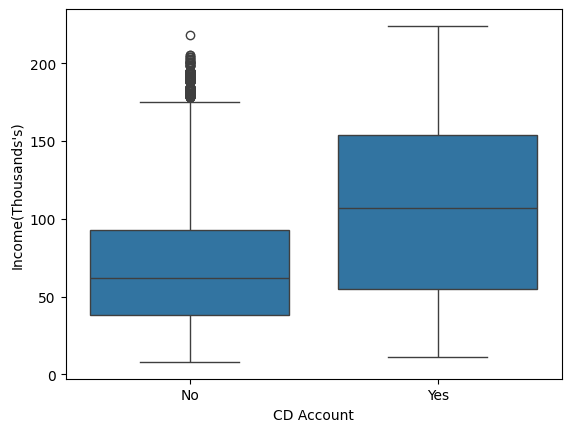

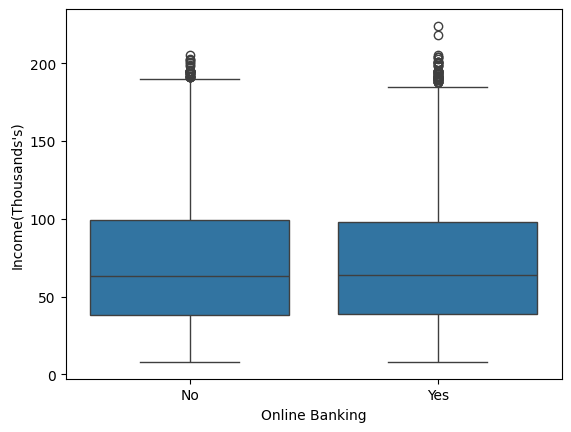

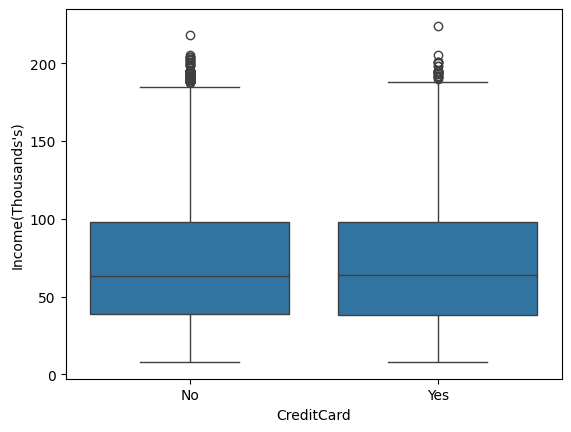

In [22]:
for column in data_graph.select_dtypes(include=['object']):
    sns.boxplot(x=column, y="Income(Thousands's)", data=data_graph)
    plt.show()

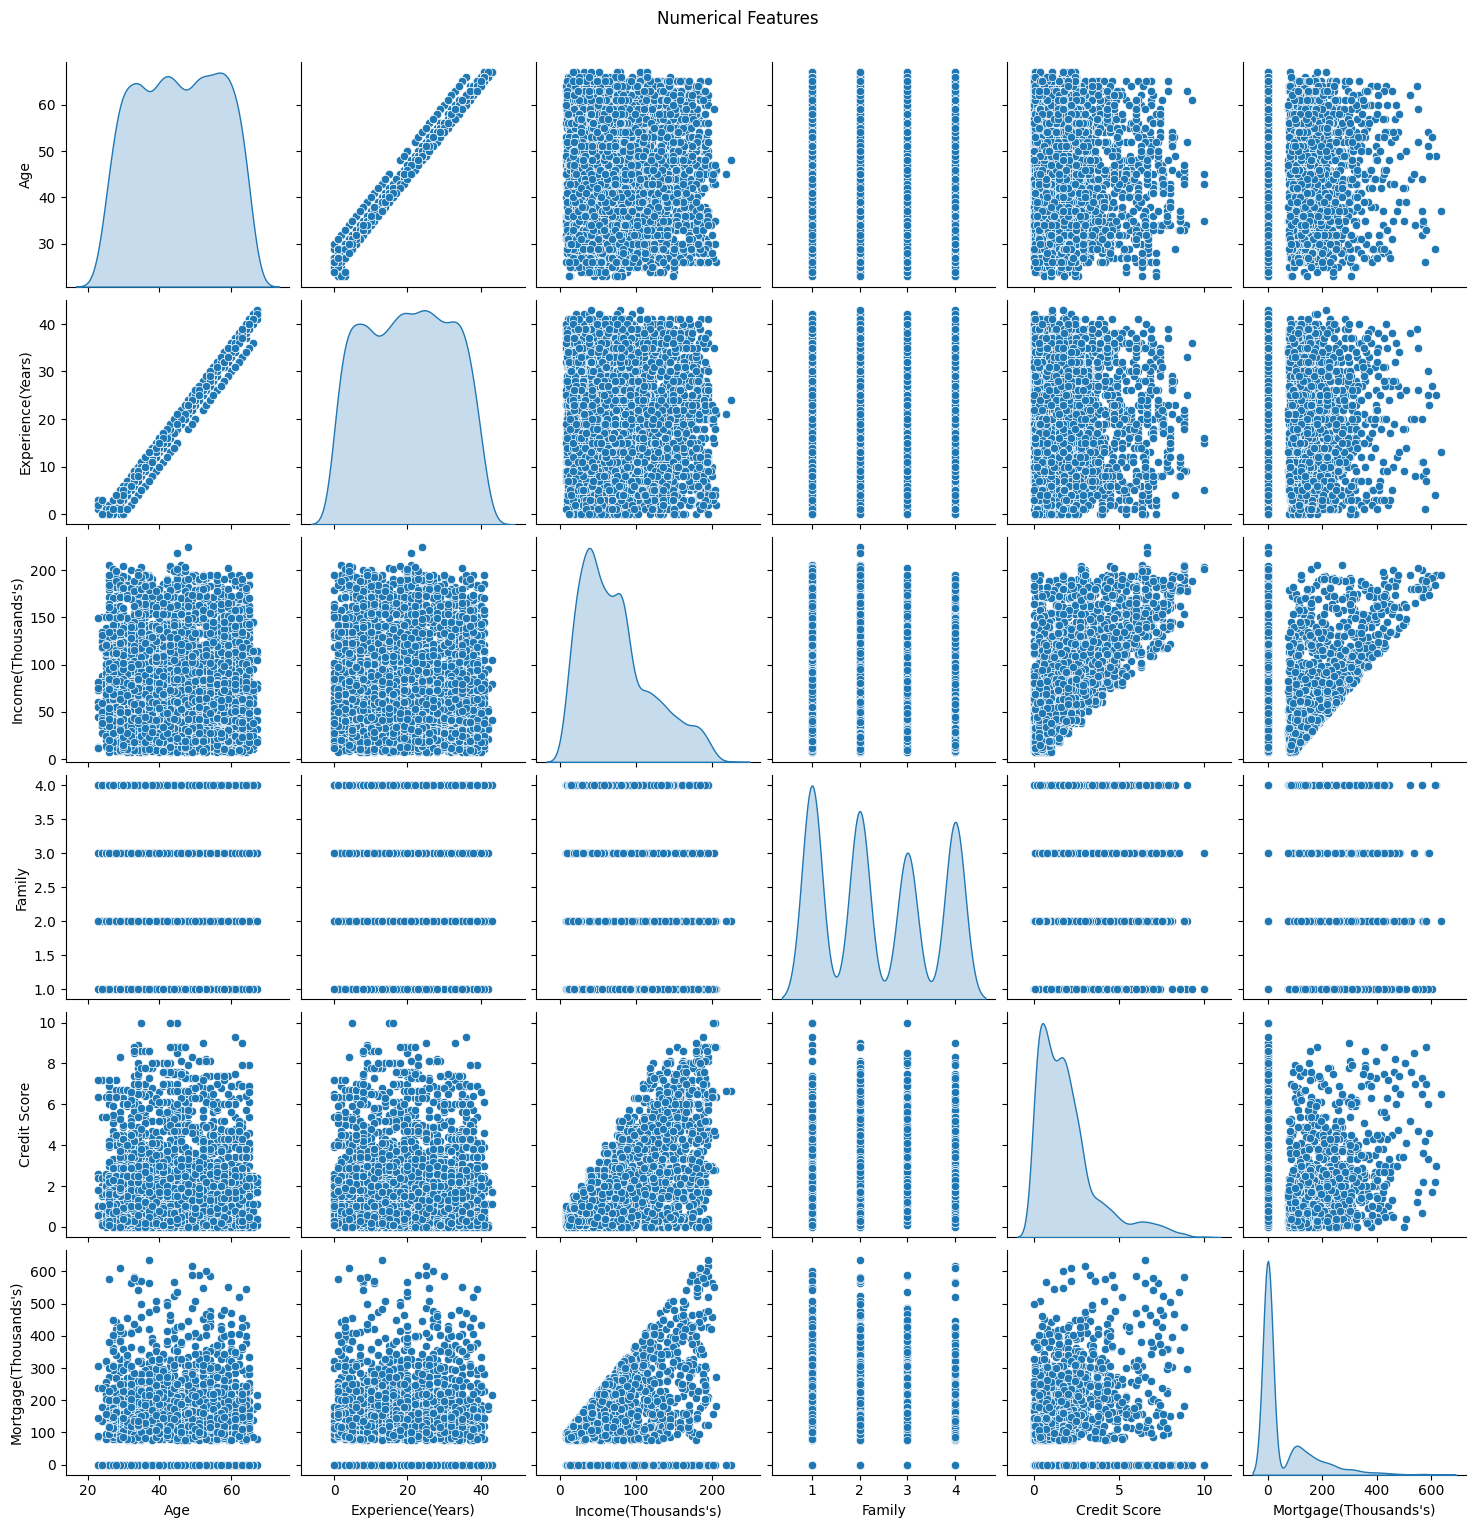

In [23]:
sns.pairplot(data_graph, diag_kind='kde')
plt.suptitle('Numerical Features', y=1.02)
plt.show()

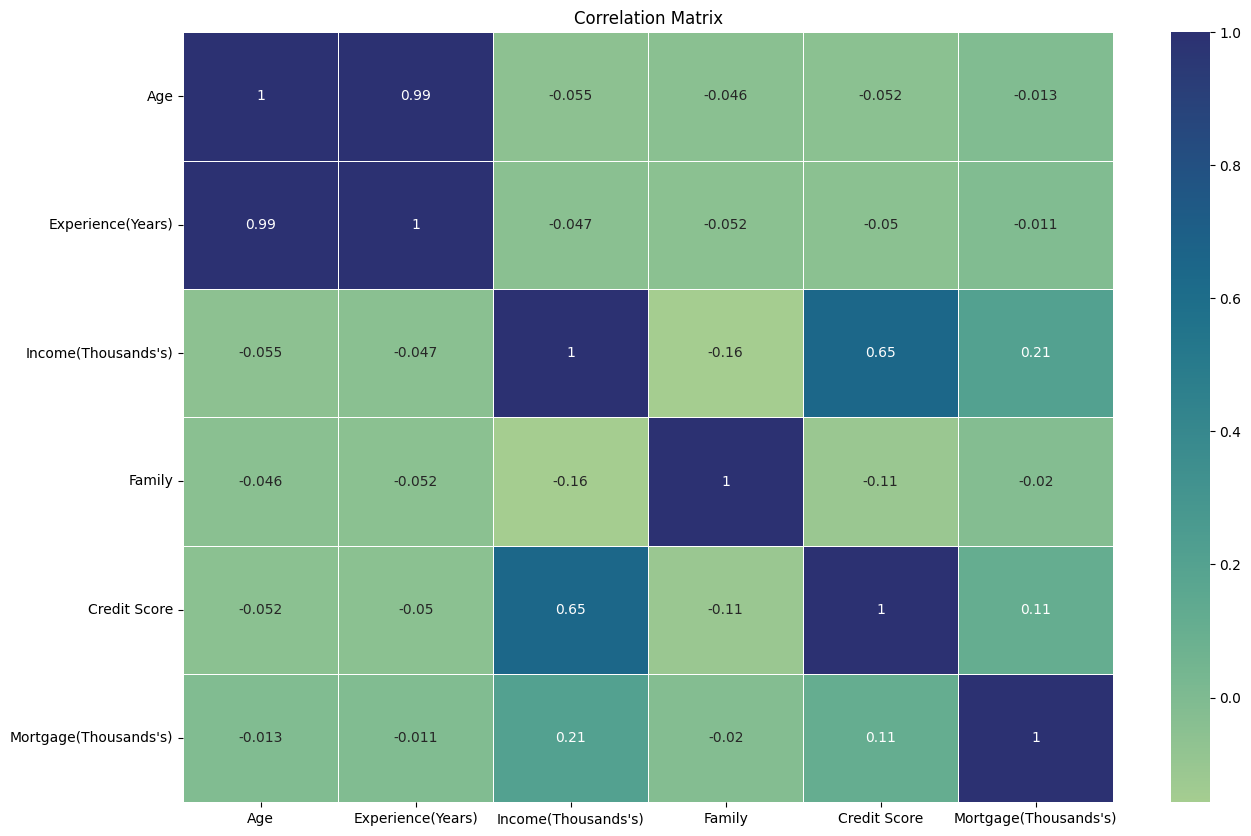

In [24]:
correlation_matrix = data_graph.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Artificial Neural Network

In [39]:
X = data_encoded.drop("Income(Thousands's)", axis = 1)
y = data_encoded["Income(Thousands's)"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=RSEED)

In [40]:
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
losses = ['mean_squared_error',
       'mean_absolute_error',
       'mean_absolute_percentage_error',
        'mean_squared_logarithmic_error',
        'log_cosh']

optimazers = ['SGD', 
              'RMSprop', 
              'Adam',
              'AdamW', 
              'Adadelta', 
              'Adagrad', 
              'Adamax', 
              'Nadam', 
              'Lion']
        


In [27]:

r2_scores = {}

for loss in losses:
    for optimazer in optimazers:
        model = Sequential()
        model.add(Input(shape=(X_train.shape[1],)))
        model.add(Dense(28, activation='relu'))
        model.add(Dense(28, activation='relu'))
        model.add(Dense(14, activation='relu'))
        model.add(Dense(14, activation='relu'))
        model.add(Dense(1))

        print(f'optimazer: {optimazer} ---- loss: {loss}')
        
        model.compile(optimizer=optimazer, loss=loss)
        history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=100)
        test_loss = model.evaluate(X_test, y_test)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        
        r2_scores[f'{optimazer}-{loss}'] = (r2)
    

optimazer: SGD ---- loss: mean_squared_error
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48417334004467544691481384058880.0000 - val_loss: 171248101352132586834719932416.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136618827372789060914749898752.0000 - val_loss: 62363345099185356949099118592.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49752416522409421234570788864.0000 - val_loss: 22710833223615594979578085376.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18118321193700278552556994560.0000 - val_loss: 8270599181187203363797729280.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6598143576488400576084705280.0000 - val_loss: 3011902321237655727774892032.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2402844548842508975628877824.0000 - val_loss: 1096843328835793644249153536.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 875043146081395853014073344.0000 - val_loss: 39943

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1082.8790 - val_loss: 1065.4811
Epoch 17/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1064.7410 - val_loss: 1045.6217
Epoch 18/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1024.5842 - val_loss: 1034.9996
Epoch 19/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1062.9143 - val_loss: 1025.4749
Epoch 20/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1001.7926 - val_loss: 995.3287
Epoch 21/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 986.8025 - val_loss: 1003.5274
Epoch 22/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 970.7305 - val_loss: 973.7300
Epoch 23/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 973.2349 - val_loss: 966.6173
Epoch 24/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1007.1155 - val_loss: 964.3880
Epoch 25/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 955.1553 - val_loss: 953.8679
Epoch 26/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 916.3797 - val_loss: 947.7888
Epoch 27/100

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 819.3080 - val_loss: 882.3621
Epoch 83/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 831.8377 - val_loss: 888.3903
Epoch 84/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 817.2325 - val_loss: 887.5092
Epoch 85/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 835.2501 - val_loss: 882.6441
Epoch 86/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 830.0883 - val_loss: 885.8087
Epoch 87/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 849.4413 - val_loss: 883.1311
Epoch 88/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 843.5751 - val_loss: 890.6250
Epoch 89/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 859.4634 - val_loss: 880.9675
Epoch 90/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 861.3397 - val_loss: 883.0150
Epoch 91/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 805.7045 - val_loss: 886.9360
Epoch 92/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 847.9310 - val_loss: 899.4588
Epoch 93/100
25/25 ━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1493.9830 - val_loss: 1397.7400
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1337.3660 - val_loss: 1286.2117
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1267.7909 - val_loss: 1194.1517
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1180.6243 - val_loss: 1127.4996
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1089.4202 - val_loss: 1073.7019
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1053.2856 - val_loss: 1041.7777
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1002.4651 - val_loss: 1012.6498
Epoch 17/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 983.9847 - val_loss: 999.8309
Epoch 18/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 947.2123 - val_loss: 992.6188
Epoch 19/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 955.9396 - val_loss: 986.5180
Epoch 20/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 921.0724 - val_loss: 972.4550
Epoch 21/

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 842.1209 - val_loss: 868.5997
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 834.4310 - val_loss: 869.8654
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 831.2493 - val_loss: 868.1695
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 808.9716 - val_loss: 865.9142
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 829.0523 - val_loss: 866.9650
Epoch 81/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 827.6859 - val_loss: 865.6262
Epoch 82/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 807.5732 - val_loss: 861.9499
Epoch 83/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 815.0891 - val_loss: 861.1310
Epoch 84/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 796.5716 - val_loss: 860.2502
Epoch 85/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 772.9806 - val_loss: 860.4420
Epoch 86/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 811.3855 - val_loss: 861.1189
Epoch 87/100
25/25 ━━━━

Epoch 40/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7304.0996 - val_loss: 7594.4580
Epoch 41/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7343.7632 - val_loss: 7594.2979
Epoch 42/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7492.8145 - val_loss: 7594.1362
Epoch 43/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7471.3359 - val_loss: 7593.9751
Epoch 44/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7969.3022 - val_loss: 7593.8125
Epoch 45/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7425.2139 - val_loss: 7593.6494
Epoch 46/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7404.6138 - val_loss: 7593.4863
Epoch 47/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7622.2529 - val_loss: 7593.3218
Epoch 48/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7503.5850 - val_loss: 7593.1587
Epoch 49/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7379.6182 - val_loss: 7592.9927
Epoch 50/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7741.2373 - val_loss

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2789.7820 - val_loss: 2582.9348
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2494.4583 - val_loss: 2536.4246
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2506.2544 - val_loss: 2492.5322
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2547.0891 - val_loss: 2451.4238
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2518.9819 - val_loss: 2413.2524
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2399.8013 - val_loss: 2377.4341
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2257.7131 - val_loss: 2343.8884
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2245.3474 - val_loss: 2312.7395
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2206.7639 - val_loss: 2283.7686
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2267.4526 - val_loss: 2256.6299
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2337.0945 - val_loss: 2231.9121
E

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 862.1149 - val_loss: 896.8118
Epoch 98/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 881.1478 - val_loss: 896.4235
Epoch 99/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 859.1096 - val_loss: 895.8869
Epoch 100/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 868.3503 - val_loss: 896.8043
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 879.7667
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
optimazer: Nadam ---- loss: mean_squared_error
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7492.7358 - val_loss: 7430.9922
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7331.8779 - val_loss: 6833.9126
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6421.8271 - val_loss: 5040.2549
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4181.3159 - val_loss: 2253.3411
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1967.0522 - val_loss: 1911.7214
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 916.0039 - val_loss: 926.0103
Epoch 26/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 877.3246 - val_loss: 920.2172
Epoch 27/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 902.3486 - val_loss: 915.5973
Epoch 28/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 909.6965 - val_loss: 914.1312
Epoch 29/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 874.1838 - val_loss: 912.7949
Epoch 30/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 915.9606 - val_loss: 905.7495
Epoch 31/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 873.0225 - val_loss: 906.4106
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 838.9044 - val_loss: 903.4387
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 881.7210 - val_loss: 902.4214
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 867.6946 - val_loss: 902.3563
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 848.1390 - val_loss: 902.2536
Epoch 36/100
25/25 ━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7711 - val_loss: 23.1346
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.7522 - val_loss: 26.4021
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9063 - val_loss: 24.3871
Epoch 59/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8226 - val_loss: 23.9844
Epoch 60/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8619 - val_loss: 23.0447
Epoch 61/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.6184 - val_loss: 24.0443
Epoch 62/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9490 - val_loss: 23.6131
Epoch 63/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.4311 - val_loss: 23.0117
Epoch 64/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8641 - val_loss: 23.6171
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8635 - val_loss: 24.6177
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.5096 - val_loss: 23.4937
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7440 - val_loss: 23.3865
Epoch 89/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7203 - val_loss: 22.8626
Epoch 90/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.1807 - val_loss: 22.9357
Epoch 91/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7610 - val_loss: 22.8389
Epoch 92/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2345 - val_loss: 22.9233
Epoch 93/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.9358 - val_loss: 22.8455
Epoch 94/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3281 - val_loss: 22.8569
Epoch 95/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.0536 - val_loss: 23.0003
Epoch 96/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.6007 - val_loss: 22.8944
Epoch 97/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4936 - val_loss: 23.1112
Epoch 98/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3610 - val_loss: 23.1860
Epoch 99/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9236 - val_loss: 24.5429
Epoch 19/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6031 - val_loss: 24.2977
Epoch 20/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8476 - val_loss: 24.2628
Epoch 21/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.3746 - val_loss: 24.2914
Epoch 22/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9282 - val_loss: 24.1152
Epoch 23/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.2519 - val_loss: 23.9570
Epoch 24/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.3365 - val_loss: 23.9627
Epoch 25/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6405 - val_loss: 23.8770
Epoch 26/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6325 - val_loss: 23.7974
Epoch 27/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.6940 - val_loss: 23.8971
Epoch 28/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.7821 - val_loss: 24.0141
Epoch 29/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.4010 - val_loss: 74.4363
Epoch 51/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.4564 - val_loss: 74.4329
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 76.0913 - val_loss: 74.4295
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.7240 - val_loss: 74.4260
Epoch 54/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.3155 - val_loss: 74.4225
Epoch 55/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.8022 - val_loss: 74.4190
Epoch 56/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.2382 - val_loss: 74.4155
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.2921 - val_loss: 74.4120
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.4065 - val_loss: 74.4085
Epoch 59/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.3180 - val_loss: 74.4049
Epoch 60/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.5410 - val_loss: 74.4013
Epoch 61/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.3964 - val_loss: 60.3774
Epoch 83/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.9402 - val_loss: 59.9678
Epoch 84/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.0847 - val_loss: 59.5525
Epoch 85/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.7786 - val_loss: 59.1324
Epoch 86/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.1226 - val_loss: 58.7136
Epoch 87/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.7670 - val_loss: 58.2906
Epoch 88/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.6528 - val_loss: 57.8640
Epoch 89/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.2179 - val_loss: 57.4348
Epoch 90/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.2264 - val_loss: 57.0011
Epoch 91/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9503 - val_loss: 56.5605
Epoch 92/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.1495 - val_loss: 56.1168
Epoch 93/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.0597 - val_loss: 27.0634
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 27.1960 - val_loss: 26.2875
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8161 - val_loss: 25.8866
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.8150 - val_loss: 25.5028
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.1838 - val_loss: 25.2656
Epoch 17/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.9749 - val_loss: 25.0357
Epoch 18/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.7974 - val_loss: 24.7985
Epoch 19/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.1515 - val_loss: 24.6658
Epoch 20/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.4489 - val_loss: 24.5898
Epoch 21/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.7239 - val_loss: 24.4528
Epoch 22/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.5540 - val_loss: 24.3697
Epoch 23/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3793 - val_loss: 22.9792
Epoch 45/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.0323 - val_loss: 22.9537
Epoch 46/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.5689 - val_loss: 22.8427
Epoch 47/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.5614 - val_loss: 22.7726
Epoch 48/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7697 - val_loss: 22.7686
Epoch 49/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.0076 - val_loss: 22.6699
Epoch 50/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.6684 - val_loss: 22.7546
Epoch 51/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7302 - val_loss: 22.8341
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2167 - val_loss: 22.5958
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.9115 - val_loss: 22.9776
Epoch 54/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8853 - val_loss: 22.6118
Epoch 55/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.5903 - val_loss: 41.5424
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.0804 - val_loss: 37.6393
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.9087 - val_loss: 36.9941
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.1399 - val_loss: 36.0897
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.7946 - val_loss: 37.4343
Epoch 81/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33.7548 - val_loss: 36.3514
Epoch 82/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.8208 - val_loss: 37.4923
Epoch 83/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.4715 - val_loss: 38.4051
Epoch 84/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.9808 - val_loss: 40.0732
Epoch 85/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.8849 - val_loss: 35.8671
Epoch 86/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.0382 - val_loss: 36.0810
Epoch 87/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.0247 - val_loss: 54.2805
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.7536 - val_loss: 53.7285
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.6211 - val_loss: 53.1983
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.0680 - val_loss: 52.6535
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.3285 - val_loss: 51.9530
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.6887 - val_loss: 51.0240
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.4781 - val_loss: 49.9524
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.8626 - val_loss: 48.9169
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 47.7522 - val_loss: 47.6424
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.2216 - val_loss: 46.4712
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.9803 - val_loss: 45.3118
Epoch 17/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.4245 - val_loss: 36.7212
Epoch 39/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.5230 - val_loss: 36.6625
Epoch 40/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.5722 - val_loss: 36.6655
Epoch 41/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.2455 - val_loss: 36.6955
Epoch 42/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.6578 - val_loss: 36.5482
Epoch 43/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.5919 - val_loss: 36.6033
Epoch 44/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.4691 - val_loss: 36.5427
Epoch 45/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.3528 - val_loss: 36.5456
Epoch 46/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.4374 - val_loss: 36.4784
Epoch 47/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.8972 - val_loss: 36.3752
Epoch 48/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.6291 - val_loss: 36.3546
Epoch 49/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7311 - val_loss: 99.7314
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7284 - val_loss: 99.7280
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7183 - val_loss: 99.7246
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7335 - val_loss: 99.7212
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7302 - val_loss: 99.7177
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7223 - val_loss: 99.7142
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7170 - val_loss: 99.7108
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7179 - val_loss: 99.7072
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7036 - val_loss: 99.7036
Epoch 79/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7062 - val_loss: 99.7001
Epoch 80/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7075 - val_loss: 99.6964
Epoch 81/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
optimazer: Adamax ---- loss: mean_absolute_percentage_error
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 99.8821 - val_loss: 99.2226
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.9504 - val_loss: 97.7885
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97.2240 - val_loss: 94.8700
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.7595 - val_loss: 89.4054
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.3086 - val_loss: 80.6148
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.1532 - val_loss: 68.7170
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.6382 - val_loss: 58.2927
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.4239 - val_loss: 55.2156
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.6490 - val_loss: 54.9409
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.3424 - val_loss: 54.6916
Epoch 11/100
25/25 ━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.1622 - val_loss: 37.5729
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.8073 - val_loss: 37.5362
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.7736 - val_loss: 37.4140
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.9708 - val_loss: 37.3672
Epoch 36/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.8057 - val_loss: 37.3411
Epoch 37/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.2096 - val_loss: 37.3455
Epoch 38/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.7406 - val_loss: 37.3079
Epoch 39/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.9502 - val_loss: 37.3952
Epoch 40/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.4654 - val_loss: 37.1968
Epoch 41/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.9753 - val_loss: 37.3317
Epoch 42/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.7309 - val_loss: 37.1546
Epoch 43/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.0951 - val_loss: 34.5446
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.6491 - val_loss: 34.5652
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.1478 - val_loss: 34.6863
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.6803 - val_loss: 34.5472
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.8880 - val_loss: 34.3090
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.2240 - val_loss: 34.7085
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.1658 - val_loss: 34.2559
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.7784 - val_loss: 34.1844
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.1281 - val_loss: 33.8973
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.0545 - val_loss: 33.9952
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31.7229 - val_loss: 34.2459
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

Epoch 30/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4198 - val_loss: 0.4132
Epoch 31/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4247 - val_loss: 0.4121
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4056 - val_loss: 0.4111
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3967 - val_loss: 0.4101
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4166 - val_loss: 0.4090
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4169 - val_loss: 0.4079
Epoch 36/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4132 - val_loss: 0.4069
Epoch 37/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4051 - val_loss: 0.4058
Epoch 38/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4056 - val_loss: 0.4048
Epoch 39/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4068 - val_loss: 0.4037
Epoch 40/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4212 - val_loss: 0.4027
Epoch 41/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2420 - val_loss: 0.2317
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2230 - val_loss: 0.2343
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2308 - val_loss: 0.2316
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2228 - val_loss: 0.2320
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2253 - val_loss: 0.2336
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2232 - val_loss: 0.2326
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2292 - val_loss: 0.2326
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2224 - val_loss: 0.2439
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2235 - val_loss: 0.2315
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2244 - val_loss: 0.2309
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2159 - val_loss: 0.2328
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2162 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2299 - val_loss: 0.2386
Epoch 99/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2401 - val_loss: 0.2389
Epoch 100/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2331 - val_loss: 0.2383
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - loss: 0.2549
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
optimazer: AdamW ---- loss: mean_squared_logarithmic_error
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17.1831 - val_loss: 15.3898
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.3463 - val_loss: 10.3160
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.8730 - val_loss: 4.9528
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1939 - val_loss: 2.2233
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7983 - val_loss: 1.1151
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9602 - val_loss: 0.6833
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6445 - val_loss: 0.5286
E

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1246 - val_loss: 17.2381
Epoch 31/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1982 - val_loss: 17.2306
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2406 - val_loss: 17.2228
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2261 - val_loss: 17.2149
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.0673 - val_loss: 17.2068
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1211 - val_loss: 17.1985
Epoch 36/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.1267 - val_loss: 17.1901
Epoch 37/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2777 - val_loss: 17.1816
Epoch 38/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2008 - val_loss: 17.1729
Epoch 39/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.0311 - val_loss: 17.1640
Epoch 40/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.9264 - val_loss: 17.1548
Epoch 41/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5076 - val_loss: 4.5334
Epoch 64/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4690 - val_loss: 4.4729
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4524 - val_loss: 4.4138
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3846 - val_loss: 4.3558
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3641 - val_loss: 4.2991
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2743 - val_loss: 4.2435
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2030 - val_loss: 4.1892
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0644 - val_loss: 4.1359
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1023 - val_loss: 4.0837
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0278 - val_loss: 4.0326
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0361 - val_loss: 3.9824
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9623 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3174 - val_loss: 17.3804
Epoch 97/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3776 - val_loss: 17.3804
Epoch 98/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3342 - val_loss: 17.3804
Epoch 99/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4535 - val_loss: 17.3804
Epoch 100/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3708 - val_loss: 17.3804
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 17.2997
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
optimazer: Nadam ---- loss: mean_squared_logarithmic_error
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 15.3879 - val_loss: 12.0825
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.8070 - val_loss: 7.0007
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8858 - val_loss: 3.4294
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8979 - val_loss: 1.6894
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3896 - val_lo

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2855 - val_loss: 0.2898
Epoch 29/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2814 - val_loss: 0.2834
Epoch 30/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2682 - val_loss: 0.2786
Epoch 31/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2733 - val_loss: 0.2726
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2667 - val_loss: 0.2668
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2648 - val_loss: 0.2611
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2589 - val_loss: 0.2550
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2659 - val_loss: 0.2493
Epoch 36/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2457 - val_loss: 0.2464
Epoch 37/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2457 - val_loss: 0.2425
Epoch 38/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2307 - val_loss: 0.2403
Epoch 39/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2257 

Epoch 62/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.0635 - val_loss: 22.4246
Epoch 63/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.9860 - val_loss: 22.9635
Epoch 64/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4093 - val_loss: 23.2301
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.9477 - val_loss: 24.5530
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3767 - val_loss: 22.4009
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3764 - val_loss: 22.1868
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.0100 - val_loss: 23.5289
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8965 - val_loss: 22.5654
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.2398 - val_loss: 23.0316
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2917 - val_loss: 22.2210
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7850 - val_loss: 22.2945
Epoch 73/100
25/25 ━━━━━━━━━━━━━

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8355 - val_loss: 22.3232
Epoch 95/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.3802 - val_loss: 22.2404
Epoch 96/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.0483 - val_loss: 22.5247
Epoch 97/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.5861 - val_loss: 22.2817
Epoch 98/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2967 - val_loss: 22.2773
Epoch 99/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.7412 - val_loss: 22.2010
Epoch 100/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2940 - val_loss: 22.2066
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 22.3537
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
optimazer: Adam ---- loss: log_cosh
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 72.4256 - val_loss: 71.9627
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.1542 - val_loss: 68.7741
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.8881 - val_loss: 59.6811
Epo

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4747 - val_loss: 23.0625
Epoch 25/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.1456 - val_loss: 23.0082
Epoch 26/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.5595 - val_loss: 23.0821
Epoch 27/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.0936 - val_loss: 22.9507
Epoch 28/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8674 - val_loss: 22.7779
Epoch 29/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.2123 - val_loss: 22.7215
Epoch 30/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7479 - val_loss: 22.7642
Epoch 31/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.1812 - val_loss: 22.6305
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7811 - val_loss: 22.5969
Epoch 33/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4621 - val_loss: 22.5587
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.5103 - val_loss: 22.4836
Epoch 35/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.8343 - val_loss: 73.3454
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.1230 - val_loss: 73.3441
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.7422 - val_loss: 73.3428
Epoch 59/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.9173 - val_loss: 73.3415
Epoch 60/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.4869 - val_loss: 73.3402
Epoch 61/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.6601 - val_loss: 73.3388
Epoch 62/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.2830 - val_loss: 73.3375
Epoch 63/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.6519 - val_loss: 73.3362
Epoch 64/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.9930 - val_loss: 73.3348
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.8379 - val_loss: 73.3335
Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.9159 - val_loss: 73.3321
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.1269 - val_loss: 54.0177
Epoch 89/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.6767 - val_loss: 53.5647
Epoch 90/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.2701 - val_loss: 53.1115
Epoch 91/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.4805 - val_loss: 52.6577
Epoch 92/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.9898 - val_loss: 52.2073
Epoch 93/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.3581 - val_loss: 51.7559
Epoch 94/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.5535 - val_loss: 51.3065
Epoch 95/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.6645 - val_loss: 50.8622
Epoch 96/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.5994 - val_loss: 50.4189
Epoch 97/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.5886 - val_loss: 49.9800
Epoch 98/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.4122 - val_loss: 49.5449
Epoch 99/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9001 - val_loss: 24.2728
Epoch 19/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.5600 - val_loss: 23.9852
Epoch 20/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.4771 - val_loss: 23.9177
Epoch 21/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.9434 - val_loss: 23.6703
Epoch 22/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.0157 - val_loss: 23.6556
Epoch 23/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.9942 - val_loss: 23.3496
Epoch 24/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7942 - val_loss: 23.2512
Epoch 25/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.4036 - val_loss: 23.2132
Epoch 26/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8419 - val_loss: 23.2592
Epoch 27/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.3365 - val_loss: 23.0790
Epoch 28/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.1782 - val_loss: 22.9974
Epoch 29/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5425 - val_loss: 22.2992
Epoch 51/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.3717 - val_loss: 22.2676
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8295 - val_loss: 22.2350
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8131 - val_loss: 22.3429
Epoch 54/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0499 - val_loss: 22.3175
Epoch 55/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5009 - val_loss: 22.4463
Epoch 56/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.1429 - val_loss: 22.4257
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.4504 - val_loss: 22.3711
Epoch 58/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0151 - val_loss: 22.3599
Epoch 59/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.2936 - val_loss: 22.1732
Epoch 60/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.7151 - val_loss: 22.2962
Epoch 61/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [41]:
best_optimizer_loss, best_r2_score = max(r2_scores.items(), key=lambda x: x[1])
print("Optimizer-Loss:", best_optimizer_loss)
print("R-squared Score:", best_r2_score)

Optimizer-Loss: Lion-mean_squared_error
R-squared Score: 0.6267619848461039


In [42]:
r2_scores

{'SGD-mean_squared_error': -1.3973493349084265e-05,
 'RMSprop-mean_squared_error': 0.5901863034000303,
 'Adam-mean_squared_error': 0.590150963314346,
 'AdamW-mean_squared_error': 0.6057239572988896,
 'Adadelta-mean_squared_error': -2.561331103527238,
 'Adagrad-mean_squared_error': 0.05160894625751389,
 'Adamax-mean_squared_error': 0.5830870701330677,
 'Nadam-mean_squared_error': 0.5939188704086985,
 'Lion-mean_squared_error': 0.6267619848461039,
 'SGD-mean_absolute_error': 0.5255625313835817,
 'RMSprop-mean_absolute_error': 0.5596337830997284,
 'Adam-mean_absolute_error': 0.5508649713000127,
 'AdamW-mean_absolute_error': 0.5624846624589159,
 'Adadelta-mean_absolute_error': -2.579487789122428,
 'Adagrad-mean_absolute_error': -1.211408693409115,
 'Adamax-mean_absolute_error': 0.5425450321464224,
 'Nadam-mean_absolute_error': 0.5781717506628221,
 'Lion-mean_absolute_error': 0.5929788820755794,
 'SGD-mean_absolute_percentage_error': 0.48499902750496915,
 'RMSprop-mean_absolute_percentage_e

Epoch 1/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6147.9097 - val_loss: 1738.4015
Epoch 2/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 1427.8514 - val_loss: 1077.3405
Epoch 3/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 1018.4279 - val_loss: 986.6368
Epoch 4/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 936.8197 - val_loss: 927.7448
Epoch 5/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 887.4623 - val_loss: 915.3104
Epoch 6/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 890.4193 - val_loss: 900.3543
Epoch 7/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 865.5643 - val_loss: 942.7596
Epoch 8/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 926.3710 - val_loss: 932.7829
Epoch 9/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - loss: 845.9354 - val_loss: 935.3195
Epoch 10/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 815.1459 - val_loss: 874.8846
Epoch 11/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 84

245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 679.4241 - val_loss: 776.7827
Epoch 66/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 663.2781 - val_loss: 784.8070
Epoch 67/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 707.1313 - val_loss: 739.0176
Epoch 68/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 701.2571 - val_loss: 754.0342
Epoch 69/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 715.2922 - val_loss: 812.3708
Epoch 70/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 652.1808 - val_loss: 756.3427
Epoch 71/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 686.4807 - val_loss: 766.7553
Epoch 72/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 698.6835 - val_loss: 763.5675
Epoch 73/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 698.4274 - val_loss: 752.7293
Epoch 74/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 660.6716 - val_loss: 761.1183
Epoch 75/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 661.1248 

Epoch 129/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - loss: 715.8091 - val_loss: 757.5368
Epoch 130/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 674.2361 - val_loss: 792.5147
Epoch 131/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 700.2139 - val_loss: 781.2593
Epoch 132/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 716.0063 - val_loss: 766.3156
Epoch 133/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 704.6215 - val_loss: 776.7934
Epoch 134/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - loss: 671.6451 - val_loss: 795.1904
Epoch 135/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - loss: 648.0038 - val_loss: 773.8163
Epoch 136/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 663.2341 - val_loss: 761.0150
Epoch 137/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 651.5246 - val_loss: 765.4921
Epoch 138/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 650.9592 - val_loss: 773.2949
Epoch 139/150
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 886u

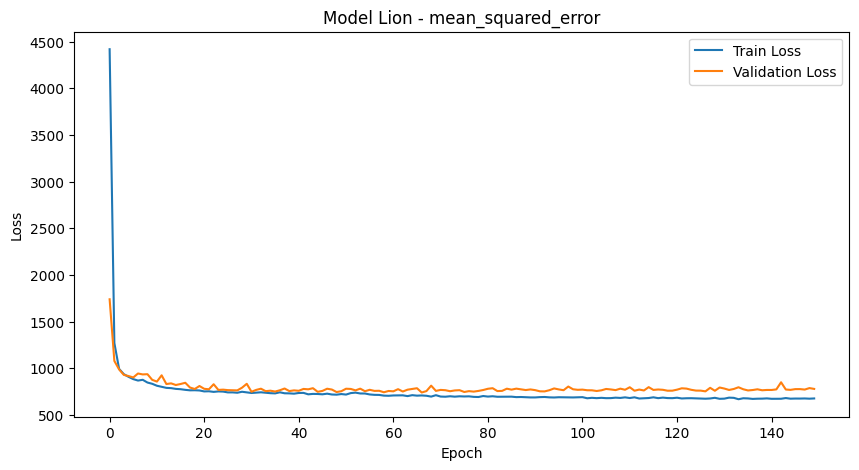

In [66]:
X = data_encoded.drop("Income(Thousands's)", axis = 1)
y = data_encoded["Income(Thousands's)"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=RSEED)

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(28, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Lion', loss='mean_squared_error')
history = model.fit(X_train, y_train, validation_split=0.3, epochs=150, batch_size=10)
test_loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
        
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

joblib.dump(model, 'model_Lion_MSE_28-28-14-14-1.pkl')

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Model Lion - mean_squared_error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show();

In [67]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 818.6337548571692


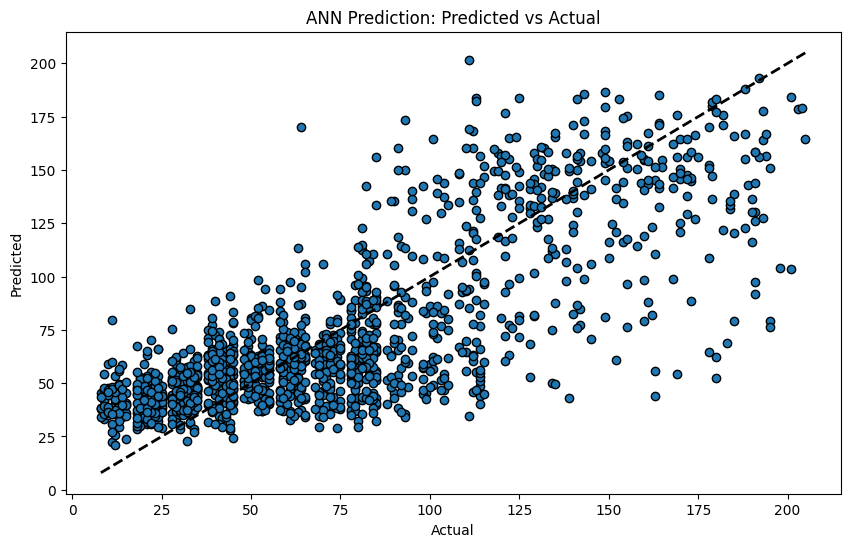

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = 'Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ANN Prediction: Predicted vs Actual')
plt.show()

# Regression Algorithms

R^2 Score 0.7924011518741039
Mean Squared Error: 440.2657771750424


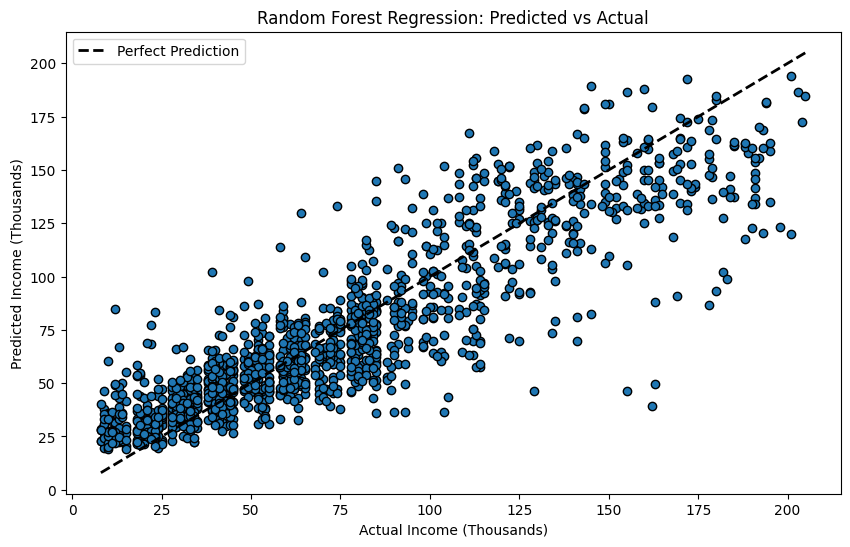

In [47]:
from sklearn.ensemble import RandomForestRegressor

X = data_encoded.drop("Income(Thousands's)", axis = 1)
y = data_encoded["Income(Thousands's)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

model = RandomForestRegressor(random_state=RSEED, n_estimators=151)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R^2 Score", r2)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = 'Perfect Prediction')
plt.xlabel('Actual Income (Thousands)')
plt.ylabel('Predicted Income (Thousands)')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.legend()
plt.show()

R^2 Score 0.6681596858101018
Mean Squared Error: 703.7511775413426


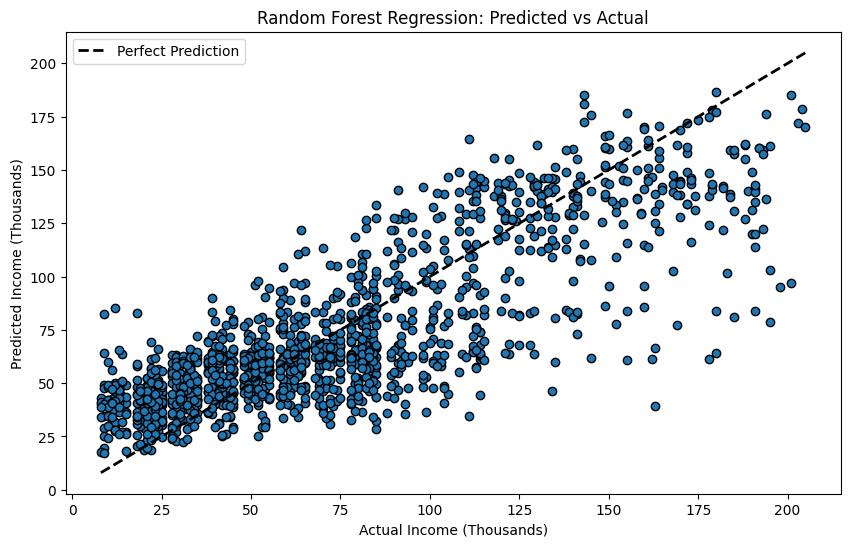

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

X = data_encoded.drop("Income(Thousands's)", axis = 1)
y = data_encoded["Income(Thousands's)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)


model = GradientBoostingRegressor(random_state=RSEED, n_estimators=151)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R^2 Score", r2)
print("Mean Squared Error:", mse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = 'Perfect Prediction')
plt.xlabel('Actual Income (Thousands)')
plt.ylabel('Predicted Income (Thousands)')
plt.title('Random Forest Regression: Predicted vs Actual')
plt.legend()
plt.show()

R^2 Score 0.5554376379469596
Mean Squared Error: 942.8067429033068


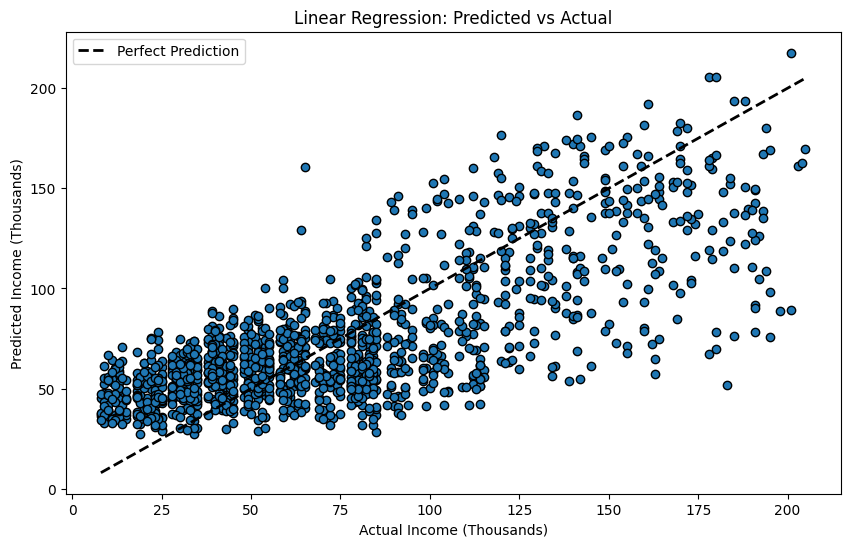

In [69]:
from sklearn.linear_model import LinearRegression

X = data_encoded.drop("Income(Thousands's)", axis = 1)
y = data_encoded["Income(Thousands's)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RSEED)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R^2 Score", r2)
print("Mean Squared Error:", mse)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2, label = 'Perfect Prediction')
plt.xlabel('Actual Income (Thousands)')
plt.ylabel('Predicted Income (Thousands)')
plt.title('Linear Regression: Predicted vs Actual')
plt.legend()
plt.show()

# Predicting New Customer Income

In [64]:
customer = {'Age': 45,
             'Experience(Years)': 12,
             'Sort Code':  93117,
             'Family': 2,
             'Credit Score': 0,
             "Mortgage(Thousands's)": 0,
             'Personal Loan': 0, 
             'Securities Account':0,
             'CD Account': 1,
             'Online Banking': 1,
             'CreditCard': 1,
             'Education_Degree': 0,
             'Education_Diploma': 0,
             'Education_Masters': 1}

df = pd.DataFrame(customer, index=[0])
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(df)

loaded_model = joblib.load('model_Lion_MSE_28-28-14-14-1.pkl')

prediction = loaded_model.predict(X_scaled)
print("New Customer predicted Income (Thousands):", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
New Customer predicted Income (Thousands): [[36.90416]]


# Sentiment analysis

In [79]:
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
#https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?resource=download
df = pd.read_csv('./twitter_training/twitter_training.csv', header=None)
column_names = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']
df.columns = column_names

In [13]:
df

Tweet ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [20]:
df_NoNulls = df.dropna()

In [21]:
df_NoNulls

Tweet ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[73996 rows x 4 columns]

In [23]:
df_NoNulls.nunique()

Tweet ID         12447
entity              32
sentiment            4
Tweet content    69491
dtype: int64

In [25]:
df_no_duplicates = df_NoNulls.drop_duplicates(subset='Tweet content')

In [26]:
df_no_duplicates

Tweet ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[69491 rows x 4 columns]

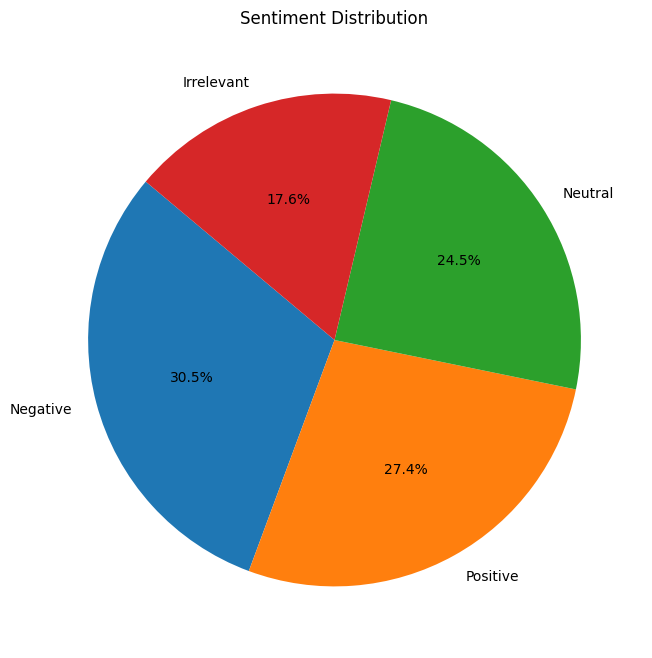

In [33]:
sentiment_counts = df_no_duplicates['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

In [35]:
sentiment_counts

sentiment
Negative      21166
Positive      19067
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64

In [58]:
df_no_duplicates_No_Irrelevant = df_no_duplicates[df_no_duplicates['sentiment'] != 'Irrelevant']

In [59]:
df_no_duplicates_No_Irrelevant

Tweet ID       entity sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   
74681      9200       Nvidia  Positive   

                                           Tweet content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[57275 rows x 4 columns]

In [60]:
sentiment_counts = df_no_duplicates_No_Irrelevant['sentiment'].value_counts()
sentiment_counts

sentiment
Negative    21166
Positive    19067
Neutral     17042
Name: count, dtype: int64

In [61]:
df_Positive = df_no_duplicates_No_Irrelevant[df_no_duplicates_No_Irrelevant['sentiment'] == 'Positive'].sample(17042, replace=False, random_state=RSEED)
df_Neutral = df_no_duplicates_No_Irrelevant[df_no_duplicates_No_Irrelevant['sentiment'] == 'Neutral']
df_Negative = df_no_duplicates_No_Irrelevant[df_no_duplicates_No_Irrelevant['sentiment'] == 'Negative'].sample(17042, replace=False, random_state=RSEED)

df_final = pd.concat([df_Positive, df_Neutral, df_Negative], axis=0)

In [62]:
df_final

Tweet ID                  entity sentiment  \
52617     10639  RedDeadRedemption(RDR)  Positive   
68408      3714           Cyberpunk2077  Positive   
24279      4561                  Google  Positive   
22498      4251                   CS-GO  Positive   
29066       600             ApexLegends  Positive   
...         ...                     ...       ...   
36050      8188               Microsoft  Negative   
55904      2396              CallOfDuty  Negative   
52776     10667  RedDeadRedemption(RDR)  Negative   
5537        153                  Amazon  Negative   
36632      8285               Microsoft  Negative   

                                           Tweet content  
52617  Just finished Red Dead Redemption 2, and it wa...  
68408  Yes, "The Russian Voice" is special for Johnny...  
24279                        Some seriously great tips!!  
22498  So I meme it about how much of each a red rage...  
29066              R99 only in care packages? All right.  
...                                                  ...  
36050                          Oh yes, the terrible news  
55904  Is it any wonder AB vision has started censori...  
52776  @RockstarGames so yall can make gta5 great and...  
5537         Alibaba x Aliexpress do not sell real Salux  
36632  I wonder what this means for the Navy... who s...  

[51126 rows x 4 columns]

In [63]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [64]:
df_final['Tweet'] = df_final['Tweet content'].apply(get_text_processing)

In [65]:
df_final

Tweet ID                  entity sentiment  \
52617     10639  RedDeadRedemption(RDR)  Positive   
68408      3714           Cyberpunk2077  Positive   
24279      4561                  Google  Positive   
22498      4251                   CS-GO  Positive   
29066       600             ApexLegends  Positive   
...         ...                     ...       ...   
36050      8188               Microsoft  Negative   
55904      2396              CallOfDuty  Negative   
52776     10667  RedDeadRedemption(RDR)  Negative   
5537        153                  Amazon  Negative   
36632      8285               Microsoft  Negative   

                                           Tweet content  \
52617  Just finished Red Dead Redemption 2, and it wa...   
68408  Yes, "The Russian Voice" is special for Johnny...   
24279                        Some seriously great tips!!   
22498  So I meme it about how much of each a red rage...   
29066              R99 only in care packages? All right.   
...                                                  ...   
36050                          Oh yes, the terrible news   
55904  Is it any wonder AB vision has started censori...   
52776  @RockstarGames so yall can make gta5 great and...   
5537         Alibaba x Aliexpress do not sell real Salux   
36632  I wonder what this means for the Navy... who s...   

                                                   Tweet  
52617  finished Red Dead Redemption 2 pretty damned a...  
68408  Yes Russian Voice special Johnny Silverhand Ju...  
24279                               seriously great tips  
22498  meme much red rager CSGO Well fuck valorant br...  
29066                            R99 care packages right  
...                                                  ...  
36050                               Oh yes terrible news  
55904  wonder AB vision started censoring Call Duty t...  
52776  RockstarGames yall make gta5 great shit fix th...  
5537                Alibaba x Aliexpress sell real Salux  
36632     wonder means Navy still uses outdated ass crap  

[51126 rows x 5 columns]

In [66]:
df_final = pd.get_dummies(df_final, columns=['sentiment'], dtype=int)
df_final = df_final.drop(['Tweet ID', 'Tweet content', 'entity'], axis = 1)

In [67]:
df_final

Tweet  sentiment_Negative  \
52617  finished Red Dead Redemption 2 pretty damned a...                   0   
68408  Yes Russian Voice special Johnny Silverhand Ju...                   0   
24279                               seriously great tips                   0   
22498  meme much red rager CSGO Well fuck valorant br...                   0   
29066                            R99 care packages right                   0   
...                                                  ...                 ...   
36050                               Oh yes terrible news                   1   
55904  wonder AB vision started censoring Call Duty t...                   1   
52776  RockstarGames yall make gta5 great shit fix th...                   1   
5537                Alibaba x Aliexpress sell real Salux                   1   
36632     wonder means Navy still uses outdated ass crap                   1   

       sentiment_Neutral  sentiment_Positive  
52617                  0                   1  
68408                  0                   1  
24279                  0                   1  
22498                  0                   1  
29066                  0                   1  
...                  ...                 ...  
36050                  0                   0  
55904                  0                   0  
52776                  0                   0  
5537                   0                   0  
36632                  0                   0  

[51126 rows x 4 columns]

In [71]:
X = df_final['Tweet'].values
y = df_final.drop('Tweet', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RSEED)

In [75]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [76]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [80]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [87]:
history = model.fit(x=X_train, y=y_train, batch_size = 1000, epochs = 50, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 164s 5s/step - accuracy: 0.9927 - loss: 0.0174 - val_accuracy: 0.9403 - val_loss: 0.1938
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.9924 - loss: 0.0176 - val_accuracy: 0.9389 - val_loss: 0.2114
Epoch 2: early stopping


In [88]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

240/240 ━━━━━━━━━━━━━━━━━━━━ 23s 94ms/step - accuracy: 0.9398 - loss: 0.2088
Test accuracy: 0.9389098882675171


In [89]:
model_score

[0.21141058206558228, 0.9389098882675171]

In [91]:
plt.show()